In [3]:
from matplotlib.colors import LogNorm
import yt 
yt.mylog.setLevel(50)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
cd ~/project/FLASH4.3_3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/object


In [5]:
i =0 
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
boxlen=int(ds.domain_width[0])

lev = 6
dim = 2**(lev+3)
all_data = ds.covering_grid(level=lev, left_edge=[0,0,0],dims=[dim,dim,dim])
dens_arr =  np.array(all_data["density"])
cell_size = int((ds.domain_width/dim)[0].in_cgs())
ri = 1.5998e18

xi_range = np.logspace(-0.1,np.log10(17),num=20)
r_range = xi_range/1.057E-17


ctr = shape(dens_arr)[0]/2
x,y,z =  np.indices((dens_arr.shape))
r = np.sqrt((x - ctr)**2 + (y -ctr)**2+(z -ctr)**2)*cell_size
ri = r_range[0]
dr  = cell_size 


In [18]:
ix,iy,iz =  np.where(np.isclose(r,ri,atol=dr))

In [15]:
shape(r)

(512, 512, 512)

In [19]:
print shape(ix[:100])
print shape(iy[:100])
print shape(iz[:100])

(100,)
(100,)
(100,)


In [21]:
MIN_CONF =  100
#shorten
s_ix  = ix[:MIN_CONF]
s_iy  = iy[:MIN_CONF]
s_iz  = iz[:MIN_CONF]

In [28]:
s_iy

array([253, 253, 253, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255,
       255, 255, 256, 256, 256, 256, 256, 256, 256, 257, 257, 257, 257,
       257, 257, 257, 258, 258, 258, 258, 258, 259, 259, 259, 251, 251,
       251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256,
       257, 257, 257, 257, 257, 257, 257, 257, 257])

In [34]:
val =np.sum(r[ix,iy,iz]*dens_arr[ix,iy,iz]*dr)

In [8]:
512**3

134217728

In [ ]:
sum_args_list = []
def plot_MR(timestep):
    ds = yt.load("sod_hdf5_chk_{}".format(str(timestep).zfill(4)))
    all_data = ds.covering_grid(level=lev, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
    dens_arr =  np.array(all_data["density"])
    print "Working on t = ", timestep
    sum_args=0
    for ri in r_range:
        ix,iy,iz =  np.where(np.isclose(r,ri,atol=dr))
        print "At radius xi= ",ri*1.057E-17,", number of blocks within dr: ",len(ix)
        val =np.sum(r[ix][iy][iz]*dens_arr[ix][iy][iz]*dr)
        sum_args_list.append(sum_args)
    print sum_args
sum_args_list = np.array(sum_args_list)

In [14]:
shape(dens_arr)

(512, 512, 512)

In [13]:
shape(r)

(512, 512, 512)

In [ ]:
shape(r[ix][iy][iz])

In [ ]:
val =np.sum(r[ix][iy][iz]*dens_arr[ix][iy][iz]*dr)

In [28]:
shape(val)

(2224, 512, 512)

In [12]:
r = r.astype(np.int)
tbin = np.bincount(r.ravel(), dens_arr.ravel())
nr = np.bincount(r.ravel())
radialprofile = tbin / nr

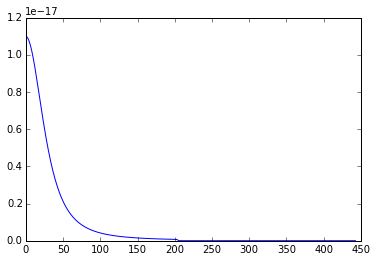

In [14]:
plt.plot(radialprofile)

In [21]:
(start-end)**3

-8741816.0

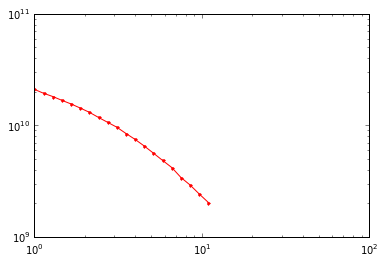

In [37]:
c = "red"
xi_range = np.logspace(0,1.04,num=20)
data = np.loadtxt("/global/homes/d/dorislee/project/FLASH4.3_3/object/fast_sum_args_list30_lev6.txt")
plt.loglog(xi_range,4*np.pi*G*data/c_s,label= "t={} for lev 5 (No Sink)".format(s), color=c,marker= '.')

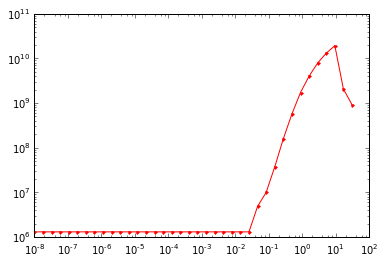

In [42]:
c = "red"
xi_range = np.logspace(-8,2,num=40)
data = np.loadtxt("/global/homes/d/dorislee/project/FLASH4.3_3/object/fast_sum_args_list30_lev6.txt")
plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t={} for lev 5 (No Sink)".format(s), color=c,marker= '.')

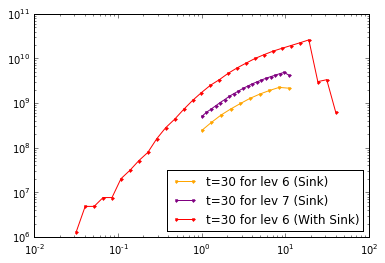

In [78]:
s=30
c = "orange"
xi_range = np.logspace(0,1.04,num=10)
data = np.loadtxt("sum_args_100_correct/sum_args_list30_lev6.txt")
plt.loglog(xi_range,4*np.pi*G*data/c_s,label= "t={} for lev 6 (Sink)".format(s), color=c,marker= '.')

c= "purple"
xi_range = np.logspace(0,1.04,num=20)
data = np.array([1.71214469e+19,2.12027434e+19,2.49749866e+19,2.95401601e+19,3.51058460e+19,4.09546891e+19,4.84624911e+19,5.56862422e+19,
   6.35445417e+19, 7.30129928e+19,8.19207763e+19, 9.19974028e+19,1.01676836e+20,1.12109058e+20,1.22919094e+20,1.33161709e+20,
   1.44128679e+20,1.55421783e+20,1.67279605e+20,1.43543958e+20])
plt.loglog(xi_range,4*np.pi*G*data/c_s,label= "t={} for lev 7 (Sink)".format(s), color=c,marker= '.')
plt.legend(loc ="lower right")
c = "red"
xi_range = np.logspace(-1.5,1.6,num=30)
data = np.loadtxt("/global/homes/d/dorislee/project/FLASH4.3_3/object/fast_sum_args_list30_lev6.txt")
plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t={} for lev 6 (With Sink)".format(s), color=c,marker= '.')
plt.legend(loc ="lower right")



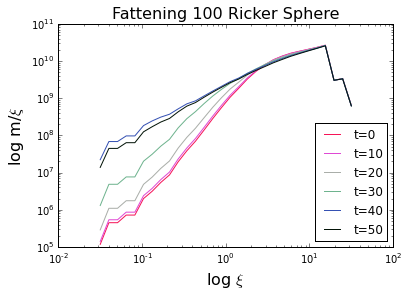

In [55]:
xi_range = np.logspace(-1.5,1.5,num=30)
tlst = [0,10,20,30,40,50]
hsv = plt.get_cmap('Plasma_r')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("fast_sum_args_list{}_lev6.txt".format(s))
    plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t={}".format(s), color=c)
plt.legend(loc ="lower right")
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("Fattening 100 Ricker Sphere",fontsize=16)
# plt.xlim(1,10)

(398107170.5534969, 31622776601.683792)

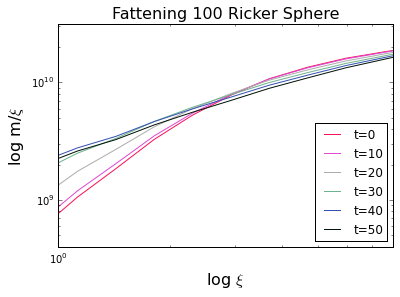

In [63]:
xi_range = np.logspace(-1.5,1.5,num=30)
tlst = [0,10,20,30,40,50]
hsv = plt.get_cmap('Plasma_r')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("fast_sum_args_list{}_lev6.txt".format(s))
    plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t={}".format(s), color=c)
plt.legend(loc ="lower right")
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("Fattening 100 Ricker Sphere",fontsize=16)
plt.xlim(1,8)
plt.ylim(10**8.6,10**10.5)

(1, 10)

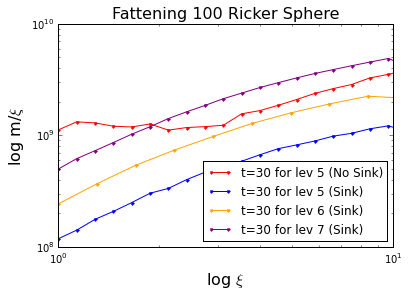

In [44]:
s = 30 
G = 6.67e-8 #cgs
c_s = 28730.5 #cm/s
tlst = [30]

c = "red"
xi_range = np.logspace(0,1.04,num=20)
data = np.loadtxt("/global/homes/d/dorislee/project/FLASH4.3_2/object/fat100/sum_args_list{}_3.txt".format(s))
plt.loglog(xi_range,4*np.pi*G*data/c_s,label= "t={} for lev 5 (No Sink)".format(s), color=c,marker= '.')
plt.legend(loc ="lower right")

c = "blue"
xi_range = np.logspace(0,1.04,num=20)
data = np.loadtxt("sum_args_100_correct/sum_args_list30_lev5.txt")
# xi_range = np.logspace(0,1.04,num=10)
# data = np.loadtxt("sum_args_list30_3.txt")
plt.loglog(xi_range,4*np.pi*G*data/c_s,label= "t={} for lev 5 (Sink)".format(s), color=c,marker= '.')
plt.legend(loc ="lower right")


c = "orange"
xi_range = np.logspace(0,1.04,num=10)
data = np.loadtxt("sum_args_100_correct/sum_args_list30_lev6.txt")
plt.loglog(xi_range,4*np.pi*G*data/c_s,label= "t={} for lev 6 (Sink)".format(s), color=c,marker= '.')
plt.legend(loc ="lower right")

c = "purple"
xi_range = np.logspace(0,1.04,num=20)
data =  np.array([1.71214469e+19,2.12027434e+19,2.49749866e+19,2.95401601e+19,3.51058460e+19,4.09546891e+19,4.84624911e+19,5.56862422e+19,
   6.35445417e+19, 7.30129928e+19,8.19207763e+19, 9.19974028e+19,1.01676836e+20,1.12109058e+20,1.22919094e+20,1.33161709e+20,
   1.44128679e+20,1.55421783e+20,1.67279605e+20,1.43543958e+20])
plt.loglog(xi_range,4*np.pi*G*data/c_s,label= "t={} for lev 7 (Sink)".format(s), color=c,marker= '.')
plt.legend(loc ="lower right")


plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("Fattening 100 Ricker Sphere",fontsize=16)
plt.xlim(1,10)

##### A more global view with finer r range for level 7 

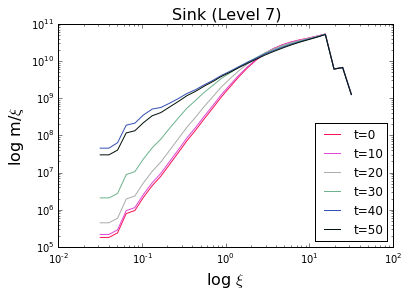

In [107]:
xi_range = np.logspace(-1.5,1.5,num=30)
tlst = [0,10,20,30,40,50]
hsv = plt.get_cmap('Plasma_r')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("fast_sum_args_list{}_lev7.txt".format(s))
    plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t={}".format(s), color=c)
plt.legend(loc ="lower right")
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("Sink (Level 7)",fontsize=16)

# Rerunning this new code on the no sink lev 2~5 simulation 

(1, 10)

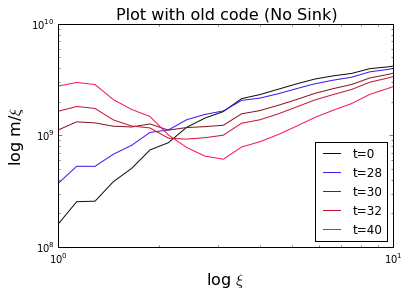

In [97]:
xi_range = np.logspace(0,1.04,num=20)
tlst = [0,28,30,32,40]
hsv = plt.get_cmap('Plasma')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("../../FLASH4.3_2/object/fat100/sum_args_list{}_3.txt".format(s))
    plt.loglog(xi_range,4*np.pi*G*data/c_s,label= "t={}".format(s), color=c)
plt.legend(loc="lower right")
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("Plot with old code (No Sink)",fontsize=16)
plt.xlim(1,10)

(1, 10)

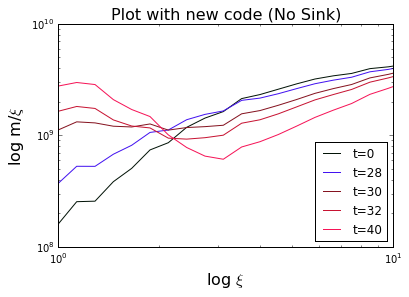

In [101]:
xi_range = np.logspace(0,1.04,num=20)
tlst = [0,28,30,32,40]
hsv = plt.get_cmap('Plasma')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("../../FLASH4.3_2/object/fat100/2fast_sum_args_list{}_lev5.txt".format(s))
    plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t={}".format(s), color=c)
plt.legend(loc="lower right")
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("Plot with new code (No Sink)",fontsize=16)
plt.xlim(1,10)

### With finer and more global ranges of radius 

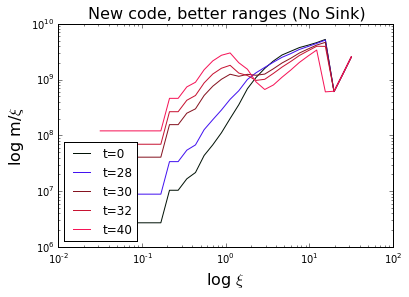

In [102]:
xi_range = np.logspace(-1.5,1.5,num=30)
tlst = [0,28,30,32,40]
hsv = plt.get_cmap('Plasma')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("../../FLASH4.3_2/object/fat100/fast_sum_args_list{}_lev5.txt".format(s))
    plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t={}".format(s), color=c)
plt.legend(loc="lower left")
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("New code, better ranges (No Sink)",fontsize=16)

(1, 10)

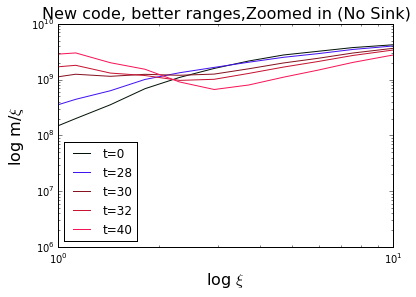

In [104]:
xi_range = np.logspace(-1.5,1.5,num=30)
tlst = [0,28,30,32,40]
hsv = plt.get_cmap('Plasma')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("../../FLASH4.3_2/object/fat100/fast_sum_args_list{}_lev5.txt".format(s))
    plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t={}".format(s), color=c)
plt.legend(loc="lower left")
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("New code, better ranges,Zoomed in (No Sink)",fontsize=16)
plt.xlim(1,10)